In [3]:
# data manipulation libraires
import numpy as np
import pandas as pd

# plotting liberaires
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# staitstical librararies
from sklearn.cluster import KMeans
from  scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import scipy.spatial.distance as sdist

# predcion libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Task 4 - Satisfaction Analysis

# Task 4. 1 - Write a Python program to assign:
a.	engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) 


In [5]:
data = pd.read_csv('clean_df.csv')

# Feature selection

In [7]:
eng_cluster = pd.read_csv('engagement_cluster.csv', index_col=0)
exp_cluster = pd.read_csv('experience_cluster.csv', index_col=0)

In [8]:
eng_cluster

,session_dur_hr,session_frequency,session_trfc_mb,clusters,users
0,3,1084,514745.010179,1,3.362632e+10
1,3,16,7348.883422,1,3.365973e+10
2,9,17,8436.419004,0,3.361489e+10
3,7,15,7525.549515,1,3.367588e+10
4,21,17,8105.869982,2,3.362578e+10
...,...,...,...,...,...
106851,2,1,199.216558,1,3.365043e+10
106852,2,1,797.900773,1,3.369839e+10
106853,1,1,266.842393,1,3.365933e+10
106854,1,1,647.084608,1,3.366566e+10


In [10]:
eng_cluster.isnull().sum()

session_dur_hr       0
session_frequency    0
session_trfc_mb      0
clusters             0
users                0
dtype: int64

In [9]:
exp_cluster

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters,users
0,46.000000,76.000000,1.767165e+06,1,0,3.360100e+10
1,31.000000,99.000000,1.767165e+06,1,0,3.360100e+10
2,63.234638,97.000000,1.767165e+06,1,0,3.360100e+10
3,84.000000,248.000000,1.767165e+06,1,0,3.360101e+10
4,119.000000,8574.991007,3.534330e+06,2,0,3.360101e+10
...,...,...,...,...,...,...
106851,52.000000,10365.000000,1.767165e+06,1,0,3.379000e+10
106852,40.000000,116.000000,1.767165e+06,1,0,3.379000e+10
106853,63.234638,1.000000,1.767165e+06,1,0,3.197021e+12
106854,63.234638,33.000000,1.767165e+06,1,0,3.370000e+14


# Load expericne and engagement centroids

In [12]:
eng_centroids = pd.read_csv('engagement_centroids.csv', index_col=0)
exp_centroids = pd.read_csv('experience_centroids.csv', index_col=0)

In [13]:
eng_centroids = eng_centroids.values.tolist()
eng_centroids

[[0.0014060598068314, 0.0001624774749483, 0.001009523918579],
 [1.0000000000000002, 1.0, 1.0],
 [0.0049230829895968, 0.001818877384975, 0.0027317096518874]]

In [14]:
exp_centroids = exp_centroids.values.tolist()

In [15]:
exp_centroids

[[0.0009150850275328,
  0.0006388648770592,
  0.0007379324503294,
  0.0002406583947682],
 [1.0, 1.0, 1.0, 1.0],
 [0.0030689293644936,
  0.0053186064342039,
  0.0026762812071597,
  0.0022075137673794]]

# - Customer Scoring

In [16]:
#define function to calcualte distance
def calc_dist (df, centroids, drop_cols=["users", "clusters"]):
    points = df.drop(columns=drop_cols)
    # get normalised points
    scaler = MinMaxScaler()
    scaler.fit(points)
    points = scaler.transform(points)
    dists = pd.DataFrame(
        sdist.cdist(points, centroids), 
        columns=['dist_{}'.format(i) for i in range(len(centroids))],
        index=df.index)
    new_df = pd.concat([df, dists], axis=1)
    #print(sdist.cdist(points, centroids))
    return new_df

In [17]:
# calculate distance

eng_dist = calc_dist(eng_cluster, eng_centroids)
exp_dist = calc_dist(exp_cluster, exp_centroids)

In [18]:
eng_dist

,session_dur_hr,session_frequency,session_trfc_mb,clusters,users,dist_0,dist_1,dist_2
0,3,1084,514745.010179,1,3.362632e+10,1.419262,0.869565,1.416567
1,3,16,7348.883422,1,3.365973e+10,0.130423,1.643291,0.126609
2,9,17,8436.419004,0,3.361489e+10,0.390473,1.519470,0.386837
3,7,15,7525.549515,1,3.367588e+10,0.303513,1.558634,0.299864
4,21,17,8105.869982,2,3.362578e+10,0.911873,1.395387,0.908305
...,...,...,...,...,...,...,...,...
106851,2,1,199.216558,1,3.365043e+10,0.085553,1.683151,0.082089
106852,2,1,797.900773,1,3.369839e+10,0.085552,1.682461,0.082063
106853,1,1,266.842393,1,3.365933e+10,0.042076,1.707050,0.038665
106854,1,1,647.084608,1,3.366566e+10,0.042073,1.706618,0.038629


In [19]:
exp_dist


,rtt_sum,trp_sum,tcp_sum,handset_count,clusters,users,dist_0,dist_1,dist_2
0,46.000000,76.000000,1.767165e+06,1,0,3.360100e+10,0.000788,1.999453,0.006631
1,31.000000,99.000000,1.767165e+06,1,0,3.360100e+10,0.000883,1.999546,0.006703
2,63.234638,97.000000,1.767165e+06,1,0,3.360100e+10,0.000722,1.999342,0.006551
3,84.000000,248.000000,1.767165e+06,1,0,3.360101e+10,0.000715,1.999203,0.006451
4,119.000000,8574.991007,3.534330e+06,2,0,3.360101e+10,0.001175,1.997614,0.005014
...,...,...,...,...,...,...,...,...,...
106851,52.000000,10365.000000,1.767165e+06,1,0,3.379000e+10,0.000616,1.998875,0.005771
106852,40.000000,116.000000,1.767165e+06,1,0,3.379000e+10,0.000820,1.999488,0.006657
106853,63.234638,1.000000,1.767165e+06,1,0,3.197021e+12,0.000730,1.999347,0.006559
106854,63.234638,33.000000,1.767165e+06,1,0,3.370000e+14,0.000728,1.999346,0.006556


> FInd the least engaged cluster and assign distance points as score

In [21]:
eng_dist.clusters.value_counts()

1    40255
2    34575
0    32026
Name: clusters, dtype: int64

**0 is the least engaged cluster, hence score is dist_0**

In [22]:
eng_dist['eng_score'] = eng_dist.dist_0

In [23]:
eng_dist.drop(columns=['dist_0','dist_1','dist_2'], inplace=True)
eng_dist

,session_dur_hr,session_frequency,session_trfc_mb,clusters,users,eng_score
0,3,1084,514745.010179,1,3.362632e+10,1.419262
1,3,16,7348.883422,1,3.365973e+10,0.130423
2,9,17,8436.419004,0,3.361489e+10,0.390473
3,7,15,7525.549515,1,3.367588e+10,0.303513
4,21,17,8105.869982,2,3.362578e+10,0.911873
...,...,...,...,...,...,...
106851,2,1,199.216558,1,3.365043e+10,0.085553
106852,2,1,797.900773,1,3.369839e+10,0.085552
106853,1,1,266.842393,1,3.365933e+10,0.042076
106854,1,1,647.084608,1,3.366566e+10,0.042073


In [25]:
eng_dist.users =eng_dist.users.astype('int64')
eng_dist

,session_dur_hr,session_frequency,session_trfc_mb,clusters,users,eng_score
0,3,1084,514745.010179,1,33626320676,1.419262
1,3,16,7348.883422,1,33659725664,0.130423
2,9,17,8436.419004,0,33614892860,0.390473
3,7,15,7525.549515,1,33675877202,0.303513
4,21,17,8105.869982,2,33625779332,0.911873
...,...,...,...,...,...,...
106851,2,1,199.216558,1,33650431620,0.085553
106852,2,1,797.900773,1,33698390293,0.085552
106853,1,1,266.842393,1,33659328207,0.042076
106854,1,1,647.084608,1,33665660120,0.042073


> FInd the worst expereinced cluster and assign distance points as score

In [26]:
exp_dist.clusters.value_counts()

0    100154
2      6701
1         1
Name: clusters, dtype: int64

**1 is the least enagaged cluster, hence score is dist_1**

In [27]:
exp_dist['exp_score'] = exp_dist.dist_1
exp_dist.drop(columns=['dist_0','dist_1','dist_2'], inplace=True)
exp_dist

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters,users,exp_score
0,46.000000,76.000000,1.767165e+06,1,0,3.360100e+10,1.999453
1,31.000000,99.000000,1.767165e+06,1,0,3.360100e+10,1.999546
2,63.234638,97.000000,1.767165e+06,1,0,3.360100e+10,1.999342
3,84.000000,248.000000,1.767165e+06,1,0,3.360101e+10,1.999203
4,119.000000,8574.991007,3.534330e+06,2,0,3.360101e+10,1.997614
...,...,...,...,...,...,...,...
106851,52.000000,10365.000000,1.767165e+06,1,0,3.379000e+10,1.998875
106852,40.000000,116.000000,1.767165e+06,1,0,3.379000e+10,1.999488
106853,63.234638,1.000000,1.767165e+06,1,0,3.197021e+12,1.999347
106854,63.234638,33.000000,1.767165e+06,1,0,3.370000e+14,1.999346


In [28]:
exp_dist.users =exp_dist.users.astype('int64')


In [29]:
exp_dist

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters,users,exp_score
0,46.000000,76.000000,1.767165e+06,1,0,33601001722,1.999453
1,31.000000,99.000000,1.767165e+06,1,0,33601001754,1.999546
2,63.234638,97.000000,1.767165e+06,1,0,33601002511,1.999342
3,84.000000,248.000000,1.767165e+06,1,0,33601007832,1.999203
4,119.000000,8574.991007,3.534330e+06,2,0,33601008617,1.997614
...,...,...,...,...,...,...,...
106851,52.000000,10365.000000,1.767165e+06,1,0,33789996170,1.998875
106852,40.000000,116.000000,1.767165e+06,1,0,33789997247,1.999488
106853,63.234638,1.000000,1.767165e+06,1,0,3197020876596,1.999347
106854,63.234638,33.000000,1.767165e+06,1,0,337000037000919,1.999346


> calculate satisfaction score

In [30]:
exp_dist_select = exp_dist[['users', 'exp_score']]
eng_dist_select = eng_dist[['users', 'eng_score']]
sat_table = exp_dist_select.merge(eng_dist_select, on='users')
sat_table['sat_score'] = (sat_table.exp_score + sat_table.eng_score)/2
sat_table

,users,exp_score,eng_score,sat_score
0,33601001722,1.999453,0.346421,1.172937
1,33601001754,1.999546,0.085554,1.042550
2,33601002511,1.999342,0.563811,1.281577
3,33601007832,1.999203,0.563811,1.281507
4,33601008617,1.997614,0.433380,1.215497
...,...,...,...,...
106851,33789996170,1.998875,0.085551,1.042213
106852,33789997247,1.999488,0.650768,1.325128
106853,3197020876596,1.999347,0.215986,1.107667
106854,337000037000919,1.999346,0.215985,1.107665


> Top Ten Satisfied Customer

In [31]:
top10_sat = sat_table.nlargest(10, columns=['sat_score'])
top10_sat

,users,exp_score,eng_score,sat_score
51717,33663201399,1.999666,0.998594,1.499130
40019,33660425296,1.999665,0.998594,1.499130
65649,33667337375,1.999665,0.998594,1.499129
94072,33761061197,1.999663,0.998594,1.499128
30919,33658407824,1.999662,0.998594,1.499128
73547,33670525721,1.999662,0.998594,1.499128
15007,33628842784,1.999660,0.998594,1.499127
79121,33681422204,1.999660,0.998594,1.499127
86010,33698663726,1.999660,0.998594,1.499127
34539,33659168298,1.999659,0.998594,1.499127


(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

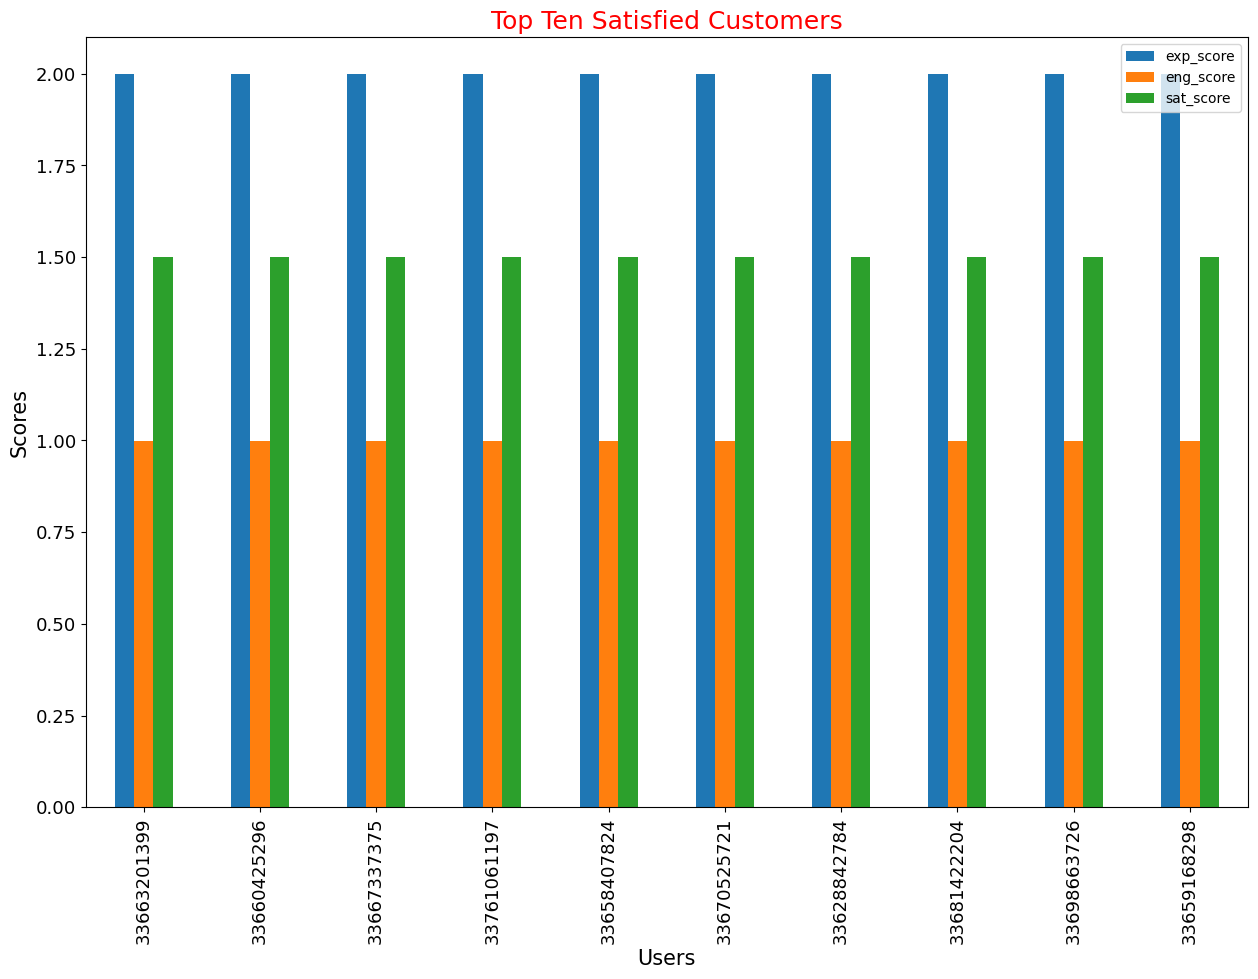

In [32]:
top10_sat.plot.bar(x='users', figsize=(15,10))
plt.title('Top Ten Satisfied Customers', fontsize=18, color='r')
plt.xlabel('Users', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


# Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 

> First let's observe the relationship between our target variable (satisfactin score)  & predictor variables

In [33]:
sat_table

,users,exp_score,eng_score,sat_score
0,33601001722,1.999453,0.346421,1.172937
1,33601001754,1.999546,0.085554,1.042550
2,33601002511,1.999342,0.563811,1.281577
3,33601007832,1.999203,0.563811,1.281507
4,33601008617,1.997614,0.433380,1.215497
...,...,...,...,...
106851,33789996170,1.998875,0.085551,1.042213
106852,33789997247,1.999488,0.650768,1.325128
106853,3197020876596,1.999347,0.215986,1.107667
106854,337000037000919,1.999346,0.215985,1.107665


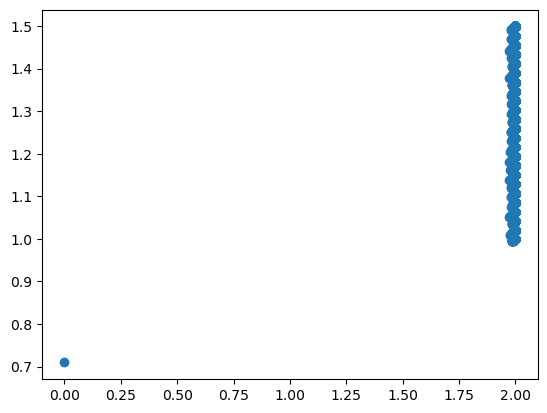

In [34]:
plt.scatter(x=sat_table.exp_score, y=sat_table.sat_score)

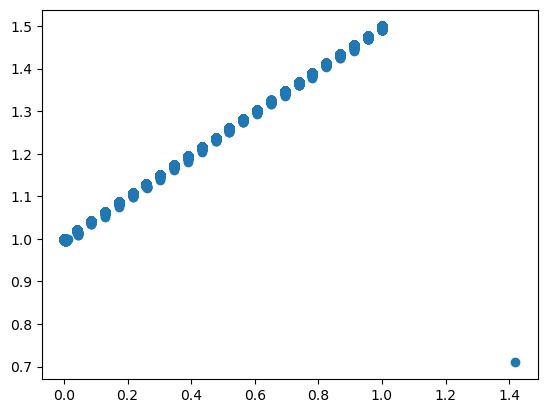

In [35]:
plt.scatter(x=sat_table.eng_score, y=sat_table.sat_score)

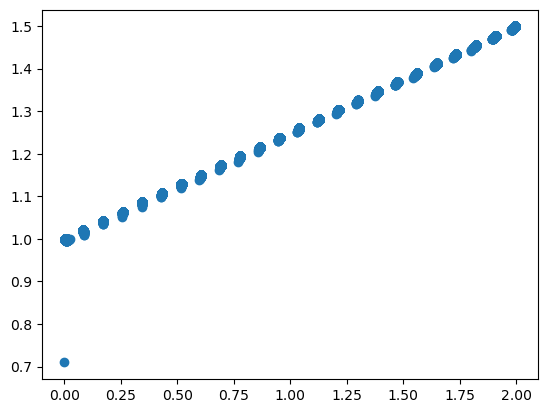

In [36]:
plt.scatter(x=(sat_table.eng_score * sat_table.exp_score) , y=sat_table.sat_score)

**We can observe a strong positive relationship between the predictor variables and the target variable**

In [37]:
x_data = sat_table[['exp_score', 'eng_score']]

In [38]:
y_data = sat_table[['sat_score']]

In [39]:
x_data

,exp_score,eng_score
0,1.999453,0.346421
1,1.999546,0.085554
2,1.999342,0.563811
3,1.999203,0.563811
4,1.997614,0.433380
...,...,...
106851,1.998875,0.085551
106852,1.999488,0.650768
106853,1.999347,0.215986
106854,1.999346,0.215985


In [40]:
y_data

,sat_score
0,1.172937
1,1.042550
2,1.281577
3,1.281507
4,1.215497
...,...
106851,1.042213
106852,1.325128
106853,1.107667
106854,1.107665


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [43]:
lm = LinearRegression()


In [44]:
model = lm.fit(x_train, y_train)

In [45]:
test_result = model.predict(x_test)

In [46]:
test_result

array([[1.2596198 ],
       [1.49874763],
       [1.34615525],
       ...,
       [1.49835412],
       [1.00046021],
       [1.17299895]])

> Check model accuracy - compare observed result of x_text with expected result of y_test

In [47]:
model.score(x_test, y_test)

1.0

# Visualizemodel accuracy

Text(0, 0.5, 'satisfaction score')

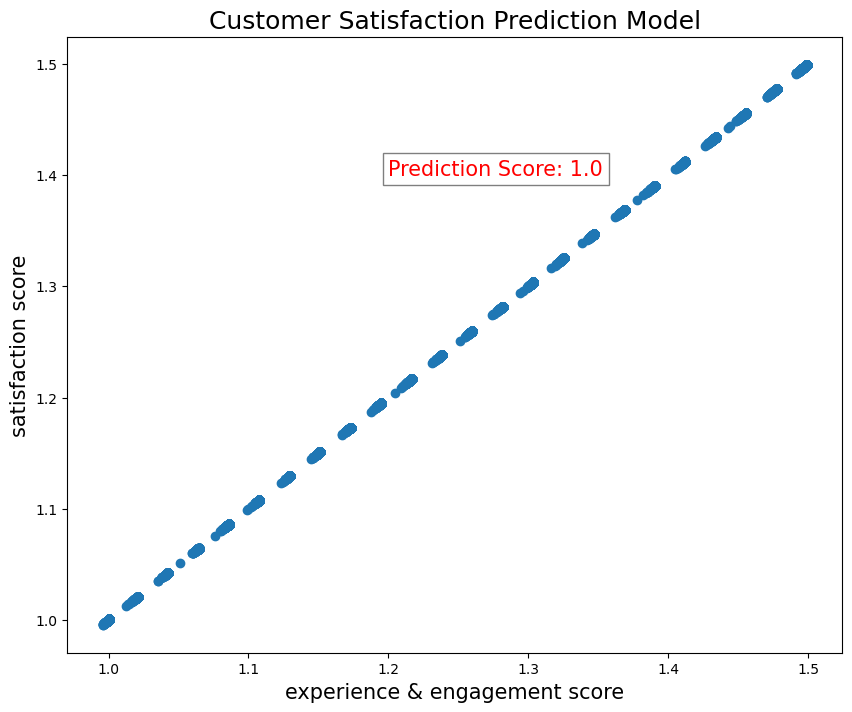

In [48]:
plt.subplots(figsize=(10,8))
plt.text(s=f'Prediction Score: {model.score(x_test, y_test)}', x=1.2, y=1.4,
         fontsize=15, color='r',  bbox=dict(facecolor='white', alpha=0.5))
plt.scatter(x=test_result, y=y_test)
plt.title('Customer Satisfaction Prediction Model', fontsize=18)
plt.xlabel('experience & engagement score', fontsize=15)
plt.ylabel('satisfaction score', fontsize=15)

**Observation-The model has high accuracy - we have a mean squared error of 1**

# Task 4.4 - Run a k-means (k=2) on the engagement & the experience score. 

In [49]:
sat_table

,users,exp_score,eng_score,sat_score
0,33601001722,1.999453,0.346421,1.172937
1,33601001754,1.999546,0.085554,1.042550
2,33601002511,1.999342,0.563811,1.281577
3,33601007832,1.999203,0.563811,1.281507
4,33601008617,1.997614,0.433380,1.215497
...,...,...,...,...
106851,33789996170,1.998875,0.085551,1.042213
106852,33789997247,1.999488,0.650768,1.325128
106853,3197020876596,1.999347,0.215986,1.107667
106854,337000037000919,1.999346,0.215985,1.107665


In [51]:
k_table = sat_table[['exp_score', 'eng_score']]
k_table


,exp_score,eng_score
0,1.999453,0.346421
1,1.999546,0.085554
2,1.999342,0.563811
3,1.999203,0.563811
4,1.997614,0.433380
...,...,...
106851,1.998875,0.085551
106852,1.999488,0.650768
106853,1.999347,0.215986
106854,1.999346,0.215985


In [52]:
km = KMeans(n_clusters=2, random_state=0)
km

KMeans(n_clusters=2, random_state=0)

In [53]:
km.fit(k_table)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [54]:
score_clusters = km.cluster_centers_

In [55]:
score_clusters

array([[1.99856269, 0.23800454],
       [1.9981541 , 0.84197929]])

In [56]:
score_labels = km.labels_

In [57]:
set(score_labels)

{0, 1}

In [58]:
k_table['clusters'] = score_labels

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15984\7134876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_table['clusters'] = score_labels


In [59]:
k_table

,exp_score,eng_score,clusters
0,1.999453,0.346421,0
1,1.999546,0.085554,0
2,1.999342,0.563811,1
3,1.999203,0.563811,1
4,1.997614,0.433380,0
...,...,...,...
106851,1.998875,0.085551,0
106852,1.999488,0.650768,1
106853,1.999347,0.215986,0
106854,1.999346,0.215985,0


# Task 4.5 - Aggregate the average satisfaction & experience score per cluster. 


In [60]:
cluster_agg = k_table.groupby('clusters').aggregate({'exp_score':'mean', 'eng_score':'mean'}).reset_index().rename(
   columns= {'exp_score':'exp_score_avg','eng_score':'eng-score_avg'})

In [61]:
cluster_agg

,clusters,exp_score_avg,eng-score_avg
0,0,1.998563,0.238005
1,1,1.998154,0.841979


Text(0, 0.5, 'Score')

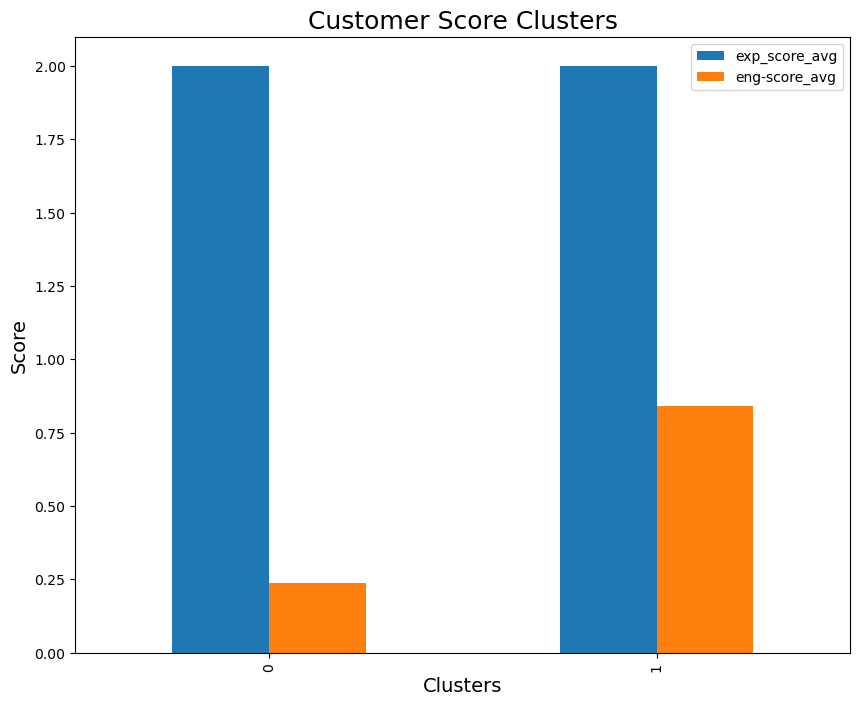

In [62]:
cluster_agg.plot.bar(figsize=(10,8), x='clusters')
plt.title('Customer Score Clusters', fontsize=18)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Score', fontsize=14)


**Cluster 0 Generally have better score than cluster 1** 